# Regression functions demo notebook

If you have not already done so, run the following command to install the statsmodels package:

`easy_install -U statsmodels`

Run the following command to install scipy and scikit-learn:

`conda install scipy`

`conda install scikit-learn`

Use the data cleaning package to import a data set:

In [1]:
from data_cleaning_utils import import_data
dat = import_data('../Data/Test/pool82014-10-02cleaned_Subset.csv')

Index(['FID', 'time', 'XCO2Dpp', 'XCH4Dpp', 'TempC', 'ChlAugL', 'TurbFNU',
       'fDOMQSU', 'ODOsat', 'ODOmgL', 'pH', 'CH4uM', 'CH4Sat', 'CO2uM',
       'CO2Sat'],
      dtype='object')
datetime column name? time


The following function runs a random model with a random independent variable y and four random covariates, using both the statsmodels and scikit-learn packages. The user can compare output from the two tools.

In [5]:
from regression import compare_OLS
compare_OLS(dat)

statsmodels OLS regression on 
 CH4Sat ~ TempC + XCO2Dpp + ODOsat + CO2Sat

                             OLS Regression Results                            
Dep. Variable:                 CH4Sat   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     2205.
Date:                Thu, 03 Mar 2016   Prob (F-statistic):               0.00
Time:                        19:00:55   Log-Likelihood:            -2.2221e+05
No. Observations:               25498   AIC:                         4.444e+05
Df Residuals:                   25493   BIC:                         4.445e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------

The two models produce the same results. 

There is no standard regression table type output from sklearn. However, sklearn offers greater features for prediction, by incorporating machine learning functionality. For that reason, we will likely wish to use both packages, for different purposes.

The `user_model` function prompts the user to input a model formula for an OLS regression, then runs the model in `statsmodel`, and outputs model results and a plot of y data vs. model fitted values.

At the prompt, you may either input your own model formula, or copy and paste the following formula as an example:

`CO2uM ~ pH + TempC + ChlAugL`

The data set contains the following covariates: 

['FID', 'time', 'XCO2Dpp', 'XCH4Dpp', 'TempC', 'ChlAugL', 'TurbFNU', 'fDOMQSU', 'ODOsat', 'ODOmgL', 'pH', 'CH4uM', 'CH4Sat', 'CO2uM', 'CO2Sat'] 

Enter your regression model formula, using syntax as shown: 
 
 dependent_variable ~ covariate1 + covariate 2 + ... 
 
CO2uM ~ pH + TempC + ChlAugL

                             OLS Regression Results                            
Dep. Variable:                  CO2uM   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                 1.142e+04
Date:                Thu, 03 Mar 2016   Prob (F-statistic):               0.00
Time:                        19:01:07   Log-Likelihood:                -93939.
No. Observations:               25498   AIC:                         1.879e+05
Df Residuals:                   25494   BIC:                         1.879e+05
Df Model:             

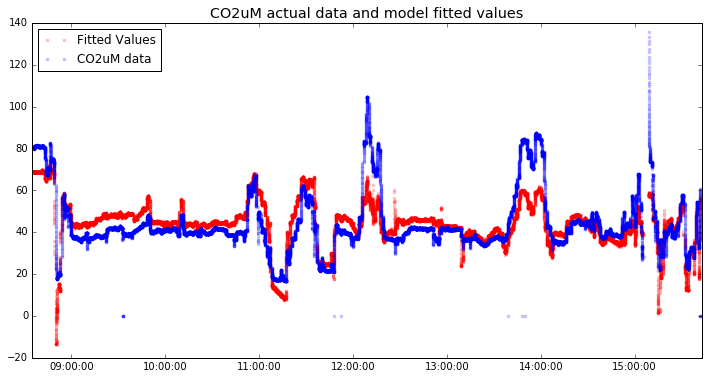

In [6]:
%matplotlib inline
from regression import user_model
user_model(data=dat)

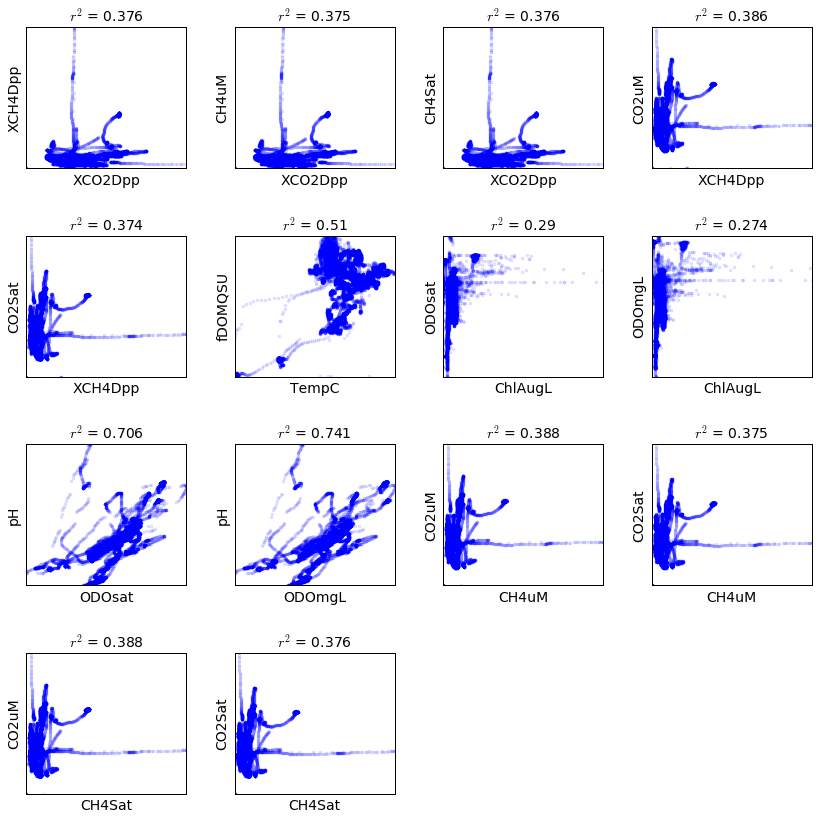

In [2]:
%matplotlib inline
from regression import plot_pairs
plot_pairs(dat)